# Bagging and random forests

In [1]:
import numpy as np
from scipy.stats import binom
from sklearn import datasets, model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import LinearSVR, LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Model aggregation

### Question 1

Having $L$ classifiers with a probability of correct prediction $p$ is equivalent to repeating independantly $L$ times a prediction with a probability of success $p$, hence the binomial law.

The probability of correct prediction is:
$\mathbb{P}(X > \frac{L}{2}) = \sum_{i=\frac{L}{2}+1}^{L}\binom{L}{i}p^i(1-p)^{L-i}$

In our case, that means:
$\mathbb{P}(X > 5) = \sum_{i=6}^{10}\binom{10}{i}0.7^i0.3^{10-i}$

In [2]:
print((1-binom.cdf(5, 10, 0.7))*100, "%")

84.97316674 %


Even with rather inefficient classifiers ($p=0.7$), making $L=10$ of them vote is enough to get a much better result.

## Bagging

### Question 1 & 2

Let's observe how the efficiency of bagging versus a single decision tree varies with depth.

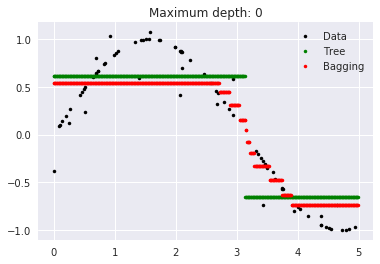

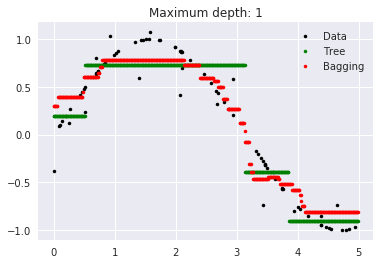

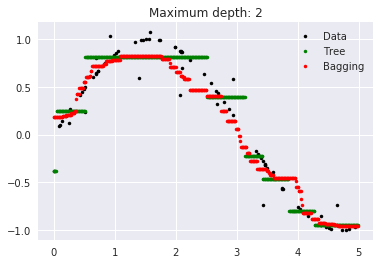

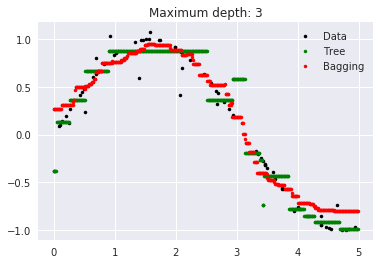

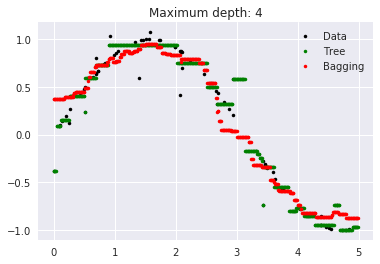

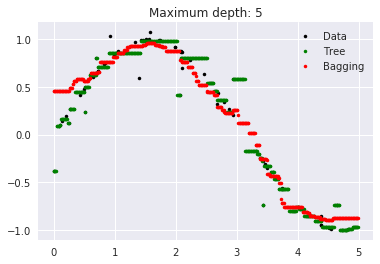

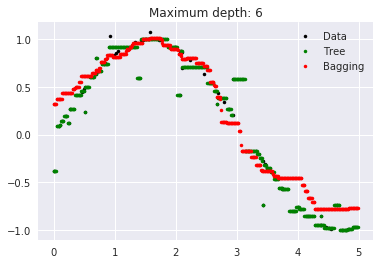

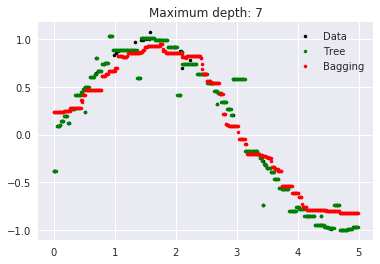

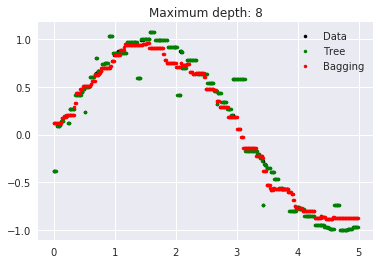

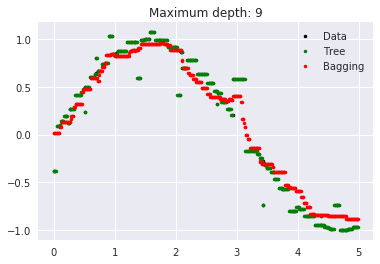

In [3]:
plt.clf()
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

err_tree = []
err_bag = []
for depth in range(tree_max_depth):
    tree = DecisionTreeRegressor(max_depth=depth+1)
    tree.fit(X, y)
    tr = DecisionTreeRegressor(max_depth=depth+1)
    bag = BaggingRegressor(tr, n_estimators, bagging_max_depth)
    bag.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bag = bag.predict(X_test)
    plt.plot(X, y, 'k.', label="Data")
    plt.plot(X_test, y_tree, 'g.', label="Tree")
    plt.plot(X_test, y_bag, 'r.', label="Bagging")
    plt.title('Maximum depth: ' + str(depth))
    plt.legend()
    plt.show()

Not only is the bagging method always better, it also improves quicker with regards to the depth of its trees.

### Question 3

The Bias-Variance dilemma is akin to over-under fitting, which can be shown by creating data that is more or less complex. This can be done in our case by adding more or less noise.

### Question 4

Let's try and showcase over-fitting.

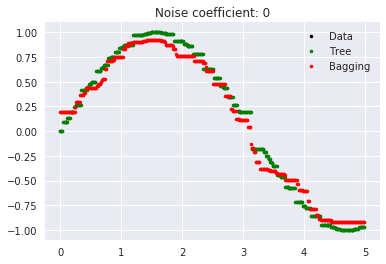

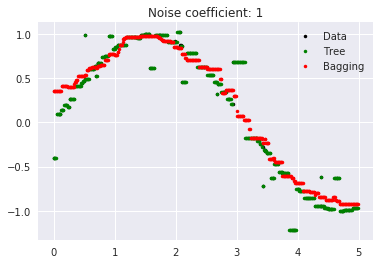

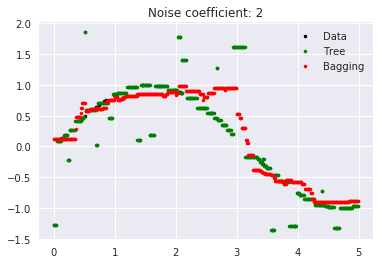

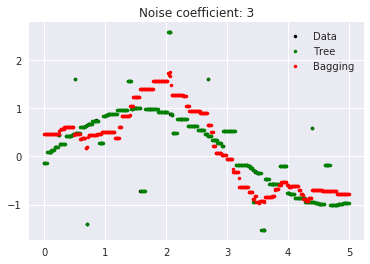

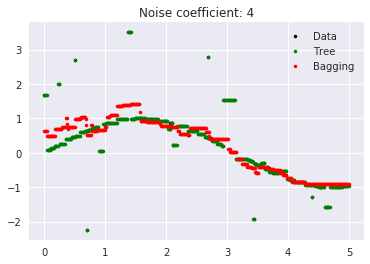

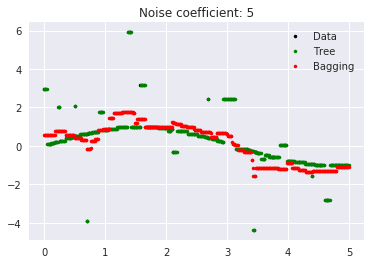

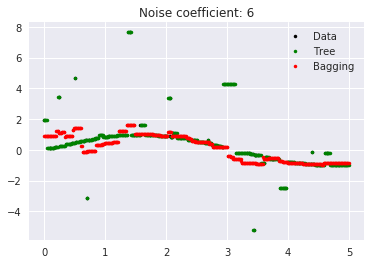

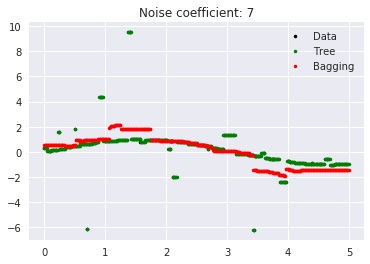

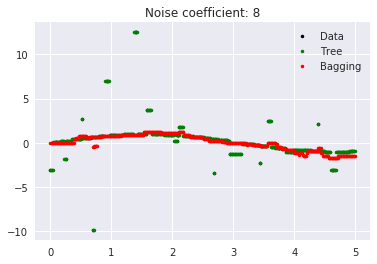

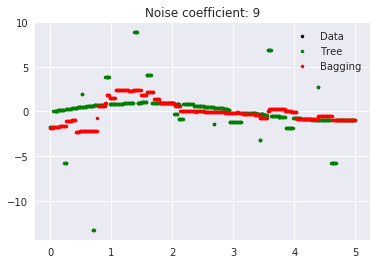

In [4]:
plt.clf()
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

for noise in range(10):
    y[::5] += noise * (0.5 - rng.rand(16))
    tree = DecisionTreeRegressor(max_depth=tree_max_depth+1)
    tree.fit(X, y)
    tr = DecisionTreeRegressor(max_depth=tree_max_depth+1)
    bag = BaggingRegressor(tr, n_estimators, bagging_max_depth)
    bag.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bag = bag.predict(X_test)
    plt.plot(X, y, 'k.', label="Data")
    plt.plot(X_test, y_tree, 'g.', label="Tree")
    plt.plot(X_test, y_bag, 'r.', label="Bagging")
    plt.title('Noise coefficient: ' + str(noise))
    plt.legend()
    plt.show()

The over-fitting of trees is clearly shown by the random points all over the place.

### Question 5

Let's improve over-fitting by drawing samples without replacement:

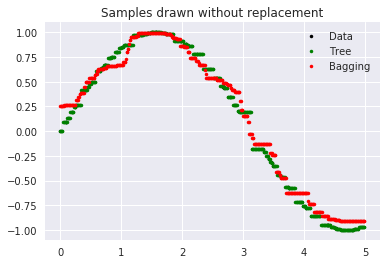

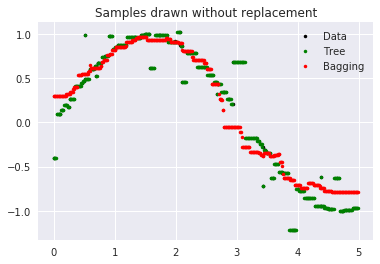

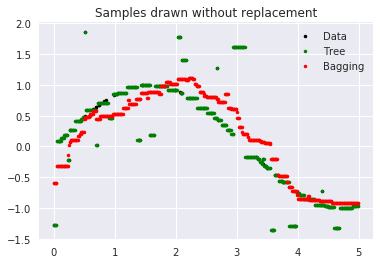

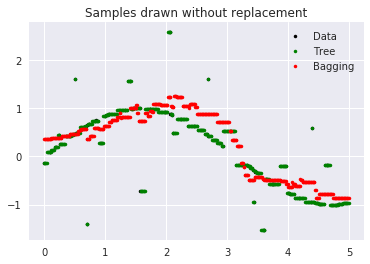

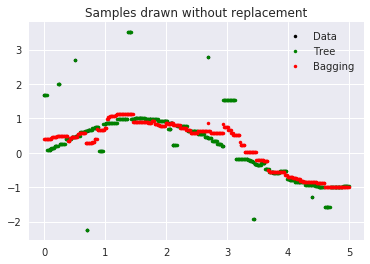

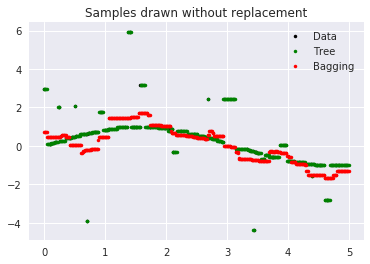

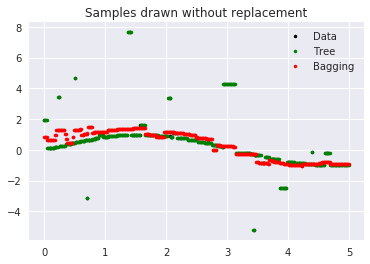

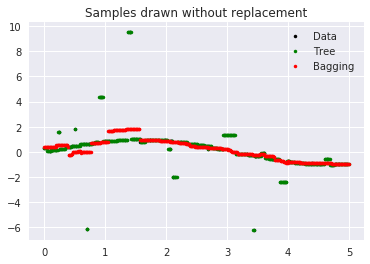

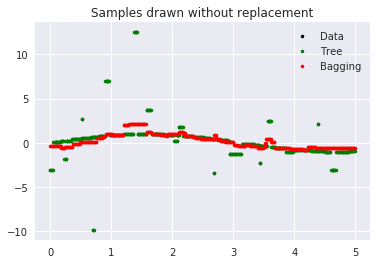

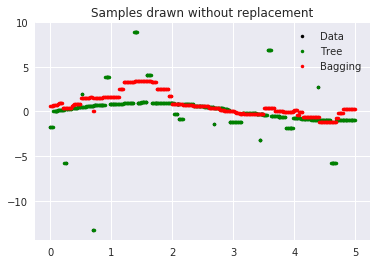

In [5]:
plt.clf()
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

for noise in range(10):
    y[::5] += noise * (0.5 - rng.rand(16))
    tree = DecisionTreeRegressor(max_depth=tree_max_depth+1)
    tree.fit(X, y)
    tr = DecisionTreeRegressor(max_depth=tree_max_depth+1)
    bag = BaggingRegressor(tr, n_estimators, bagging_max_depth, bootstrap=False)
    bag.fit(X, y)

    # Predict
    X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    y_tree = tree.predict(X_test)
    y_bag = bag.predict(X_test)
    plt.plot(X, y, 'k.', label="Data")
    plt.plot(X_test, y_tree, 'g.', label="Tree")
    plt.plot(X_test, y_bag, 'r.', label="Bagging")
    plt.title('Samples drawn without replacement')
    plt.legend()
    plt.show()

Overfitting seems to be less of an issue.

## Random forests

### Question 6

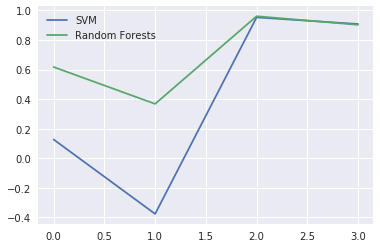

In [6]:
# Regression sets
X_boston, y_boston = datasets.load_boston(True)
X_diabetes, y_diabetes = datasets.load_diabetes(True)
# Classification sets
X_iris, y_iris = datasets.load_iris(True)
X_digits, y_digits = datasets.load_digits(return_X_y=True)

svr = LinearSVR()
svc = LinearSVC()
rfr = RandomForestRegressor()
rfc = RandomForestClassifier()

score_svm = []
score_rf = []
score_svm.append(model_selection.cross_val_score(svr, X_boston, y_boston, cv=7, n_jobs=-1).mean())
score_svm.append(model_selection.cross_val_score(svr, X_diabetes, y_diabetes, cv=7, n_jobs=-1).mean())
score_svm.append(model_selection.cross_val_score(svc, X_iris, y_iris, cv=7, n_jobs=-1).mean())
score_svm.append(model_selection.cross_val_score(svc, X_digits, y_digits, cv=7, n_jobs=-1).mean())
score_rf.append(model_selection.cross_val_score(rfr, X_boston, y_boston, cv=7, n_jobs=-1).mean())
score_rf.append(model_selection.cross_val_score(rfr, X_diabetes, y_diabetes, cv=7, n_jobs=-1).mean())
score_rf.append(model_selection.cross_val_score(rfc, X_iris, y_iris, cv=7, n_jobs=-1).mean())
score_rf.append(model_selection.cross_val_score(rfc, X_digits, y_digits, cv=7, n_jobs=-1).mean())

plt.clf()
plt.plot(score_svm, label="SVM")
plt.plot(score_rf, label="Random Forests")
plt.legend()
plt.show()

Random forests consistently have a better score.

### Question 7

Prediction probabilities:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
    np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
# TODO use predict to obtain the probabilities you will store in Z
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
    plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
        cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()

ValueError: Number of features of the model must match the input. Model n_features is 2 and input n_features is 319 